# Dating Apps Topic Analysis for Low Google Ratings

**In the current notebook, a dataset containing >600,000 rows with Google ratings and reviews on Tinder, Bumble and Hinge is analyzed with NLP (Natural Language Processing) to gather information on recurrent topics within low ratings (1 and 2 stars).**

**The dataset was obtained by merging three different Kaggle datasets:**

*   Tinder Dating App - Google Play Store Review (https://www.kaggle.com/datasets/shivkumarganesh/tinder-google-play-store-review)
*   Bumble Dating App - Google Play Store Review (https://www.kaggle.com/datasets/shivkumarganesh/bumble-dating-app-google-play-store-review)
*   Hinge Dating App - Google Play Store Review (https://www.kaggle.com/datasets/shivkumarganesh/hinge-google-play-store-review)




## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/DatingAppReviewsDataset.csv')
df

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder
...,...,...,...,...,...,...,...
681989,52989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,12-07-2017 01:44,Hinge
681990,52990,Brian Shook,I can't get past the initial set up. It won't...,1,11,12-07-2017 01:36,Hinge
681991,52991,A Google user,This is incredible! A quality dating app for A...,5,1,12-07-2017 01:32,Hinge
681992,52992,A Google user,"""Over Water"" ... Can't choose location.",2,8,12-07-2017 01:28,Hinge


## Data Pre-Processing

### Columns names in lower case

In [ ]:
df.rename(columns=lambda x: x.lower(), inplace=True)

Index(['unnamed: 0', 'name', 'review', 'rating', '#thumbsup', 'date&time',
       'app'],
      dtype='object')

### Rename columns

In [ ]:
df = df.rename(columns={'#thumbsup': 'thumbsup'})

In [ ]:
df = df.drop(['unnamed: 0','name'], axis=1)

### Split date and time column

In [ ]:
df[['date', 'time']] = df['date&time'].str.split(' ', expand=True)
df = df.drop(['date&time'], axis=1)

### Saving clean dataframe

In [ ]:
df.to_csv('/content/drive/MyDrive/DatingAppReviewsDataset_clean.csv')

## Graphs

### Rating frequency

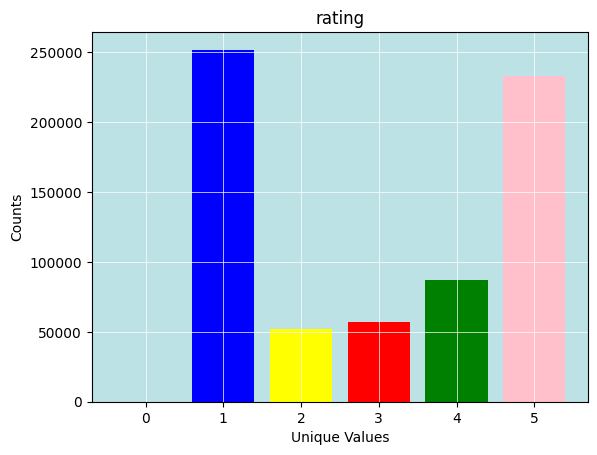

In [ ]:
import matplotlib.pyplot as plt

value_counts = df['rating'].value_counts()
colors = ['blue', 'pink', 'green','red','yellow']

plt.bar(value_counts.index, value_counts.values, color=colors)
ax = plt.gca()
ax.set_facecolor('#bce2e6')
plt.grid(color='white', linestyle='-', linewidth=0.5)



plt.title('rating')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
#ax.invert_xaxis()

plt.show()

In [ ]:
value_counts = df['app'].value_counts()
colors = ['blue', 'pink', 'green','red','yellow']

plt.bar(value_counts.index, value_counts.values, color=colors)
ax = plt.gca()
ax.set_facecolor('#bce2e6')
plt.grid(color='white', linestyle='-', linewidth=0.5)



plt.title('app')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
#ax.invert_xaxis()

plt.show()

### Mean app rating per month over time

In [ ]:
df['date'] = pd.to_datetime(df['date']) # changing the date data to date type
monthly_mean_rating = df.groupby([df['date'].dt.to_period('M'), 'app'])['rating'].mean() # data grouping by date (to have it as date and month) and app
monthly_mean_rating_df = monthly_mean_rating.reset_index() # conversion to dataframe
monthly_mean_rating_df.rename(columns={"rating":"mean_rating"}, inplace=True) # column renaming
monthly_mean_rating_df['date'] = pd.to_datetime(monthly_mean_rating_df['date'].dt.to_timestamp()) # changing again the type to date type; otherwise it gives error

In [ ]:
# Graph for app mean rating over time

app_colors = {                   # Define the colours for each app as RGB
    'Tinder': (253, 85, 100),
    'Hinge': (75, 0, 130),
    'Bumble': (255, 198, 41)
}

hex_colors = ['#%02x%02x%02x' % color for color in app_colors.values()]    # convert the RGB colours to hex_colours so that they can be read by seaborn

plt.figure(figsize=(20,5))

sns.lineplot(data=monthly_mean_rating_df, x='date', y='mean_rating', hue='app', palette = hex_colors, linewidth = 2.5) # create graph

plt.xlabel("Date", fontsize=25, weight="bold", labelpad=20)
plt.ylabel("Mean Rating", fontsize=25, weight="bold", labelpad=20)
plt.title("Mean App Rating Over Time", fontsize=30, weight="bold",)


plt.ylim(0, 5)

plt.savefig("mean_app_rating_per_month.png")

plt.show()

### Amount of app user reviews per month over time

In [ ]:
# Graph for app total ratings over time

app_colors = {                   # Define the colours for each app as RGB
    'Tinder': (253, 85, 100),
    'Hinge': (75, 0, 130),
    'Bumble': (255, 198, 41)
}

hex_colors = ['#%02x%02x%02x' % color for color in app_colors.values()]    # convert the RGB colours to hex_colours so that they can be read by seaborn

plt.figure(figsize=(20,5))

sns.lineplot(data=monthly_total_ratings_df, x='date', y='total_ratings', hue='app', palette = hex_colors, linewidth = 2.5) # create graph
plt.xlabel("Date", fontsize=25, weight="bold", labelpad=20)
plt.ylabel("Total Ratings", fontsize=25, weight="bold", labelpad=20)
plt.title("Total App Ratings Over Time", fontsize=30, weight="bold",)


#plt.ylim(0, 5)

plt.savefig("total_app_ratings_per_month.png")

plt.show()

## Topics analysis based on reviews with low ratings (1 or 2 stars)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
#nltk.download('omw-1.4')

#### Subset Selection

In [ ]:
df_low_rating = df[df['rating'] < 3] # we select only the reviews that are 1 or 2 stars
df_low_rating

,review,rating,thumbsup,app,date,time
2,Still doesn't correctly notify matches or mess...,1,0,Tinder,18-02-2022,01:11
3,"Got banned because I updated my bio to say ""I ...",2,0,Tinder,18-02-2022,01:11
7,Just tested after originally noticing a flux ;...,1,0,Tinder,18-02-2022,00:37
10,"I don't know why I was banned again, what happ...",2,0,Tinder,18-02-2022,00:23
12,They banned my account without me doing anything,1,0,Tinder,18-02-2022,00:16
...,...,...,...,...,...,...
681988,Location is searching over water. Lame,1,0,Hinge,12-07-2017,01:47
681989,Useless - I'm in the UK and it tells me i'm ov...,2,5,Hinge,12-07-2017,01:44
681990,I can't get past the initial set up. It won't...,1,11,Hinge,12-07-2017,01:36
681992,"""Over Water"" ... Can't choose location.",2,8,Hinge,12-07-2017,01:28


In [ ]:
reviews = df_low_rating[['review']] # we create a dataframe only containing the reviews content for 1 and 2 stars

In [ ]:
df_low_rating.to_csv('/content/drive/MyDrive/DatingAppReviews_Low_Rating.csv')

#### Splitting the datasets for the three different apps
---



In [ ]:
df_low_rating_tinder = df_low_rating.loc[df_low_rating['app'] == 'Tinder']
df_low_rating_hinge = df_low_rating.loc[df_low_rating['app'] == 'Hinge']
df_low_rating_bumble = df_low_rating.loc[df_low_rating['app'] == 'Bumble']

In [ ]:
df_low_rating_tinder.to_csv('/content/drive/MyDrive/Reviews_Low_Rating_Tinder.csv')
df_low_rating_hinge.to_csv('/content/drive/MyDrive/Reviews_Low_Rating_Hinge.csv')
df_low_rating_bumble.to_csv('/content/drive/MyDrive/Reviews_Low_Rating_Bumble.csv')

#### Sample Creation for Text Pre-Processing

In [ ]:
reviews.shape

In [ ]:
reviews.isnull().sum() # determination of null value presence

In [ ]:
reviews = reviews.fillna('.') # we fill the null values to simply the processing steps downstream

Now, a sub-sample is selected in order to process the dataset faster.

In [ ]:
sample = reviews['review'].sample(n=1000, replace=False) # we select random samples
sample = sample.reset_index(drop=True, inplace=True)

#### Text Pre-Processing

In [ ]:
import spacy # you have to install spacy before being able to import it

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import gensim
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, stem_text

In [ ]:
import string

In [ ]:
nlp = spacy.load('en_core_web_sm')
all_stopwords = nlp.Defaults.stop_words
all_stopwords.add("i, as, app, dating")
all_stopwords = sorted(all_stopwords)

In [ ]:
for i in all_stopwords:
  print(i)

'd
'll
'm
're
's
've
a
about
above
across
after
afterwards
again
against
all
almost
alone
along
already
also
although
always
am
among
amongst
amount
an
and
another
any
anyhow
anyone
anything
anyway
anywhere
are
around
as
at
back
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
between
beyond
both
bottom
but
by
ca
call
can
cannot
could
did
do
does
doing
done
down
due
during
each
eight
either
eleven
else
elsewhere
empty
enough
even
ever
every
everyone
everything
everywhere
except
few
fifteen
fifty
first
five
for
former
formerly
forty
four
from
front
full
further
get
give
go
had
has
have
he
hence
her
here
hereafter
hereby
herein
hereupon
hers
herself
him
himself
his
how
however
hundred
i
if
in
indeed
into
is
it
its
itself
just
keep
last
latter
latterly
least
less
made
make
many
may
me
meanwhile
might
mine
more
moreover
most
mostly
move
much
must
my
myself
n't
name
namely
neither
never
nevertheless
next
nine
no
nobody
none
noone
nor
not
not

In [ ]:
reviews['review'] = reviews['review'].apply(lambda x: x.lower()) # remove stopwords
reviews['review'] = reviews['review'].apply(lambda x: remove_stopwords(x)) # remove stopwords

In [ ]:
reviews_tokens = reviews['review'].apply(lambda x: word_tokenize(x)) # make tokens

In [ ]:
reviews_clean = reviews_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))
reviews_np = reviews_clean.apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
reviews_np = reviews_np.apply(lambda x: x.lower().strip())

In [ ]:
reviews_np = reviews_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))

In [ ]:
reviews_np.to_csv('/content/drive/MyDrive/reviews_np.csv')

#### Use Stemming to Reduce Base Words into Stem Words

In [ ]:
reviews_stemmed = reviews_np.apply(lambda x: stem_text(x))
reviews['stems'] = reviews_stemmed
reviews['stems'][0:10]

2     correctli notifi match messag . monopoli expec...
3     got ban updat bio `` feel like girl look plug ...
7     test origin notic flux ; 14/20 escort app funn...
10                       know ban , happen ? understand
12                                          ban account
13                                                   😜😛
14    ingat ada free version , rupanya mcm semua ken...
16    tinder advertis snapchat ? like snapchat adver...
18                                                coupl
20                            bad experi , monei sucker
Name: stems, dtype: object

#### Saving Stemmed Reviews

In [ ]:
reviews.to_csv('/content/drive/MyDrive/reviews_with_stems.csv')

#### Key Word Extraction

In [ ]:
pip install yake

In [ ]:
import yake

In [ ]:
yaxtract_mod = yake.KeywordExtractor(lan='en', n=1, dedupLim=0.7, top=5, dedupFunc='seqm', windowsSize=1)

In [ ]:
sample = reviews.sample(n=1000, replace=False) # we select random samples

In [ ]:
sample

,review,stems
209642,waste,wast
623941,simple accidental left swipe unmatched someone...,simpl accident left swipe unmatch . undo comma...
167847,"worthless app marketplace, want total access f...","worthless app marketplac , want total access f..."
166526,twice account looking women likes bdsm. twice ...,twice account look women like bdsm . twice acc...
338030,"ooops,, went wrong app keeps logged time","ooop , , went wrong app keep log time"
...,...,...
439690,internet connection stable wont open.. keeps '...,internet connect stabl wont open .. keep 'load '
424497,app crashes ~30 profiles. photos loading- endl...,app crash ~30 profil . photo loading- endless ...
42107,tbh app help realize undesirable unattractive ...,tbh app help realiz undesir unattract . work f...
161018,wants talk me.,want talk .


In [ ]:
keywords = sample['stems'].apply(lambda x: yaxtract_mod.extract_keywords(x))

In [ ]:
keywords_clean = keywords.apply(lambda i: list(dict(i).keys()))

keywords_str = keywords_clean.apply(lambda x: ' '.join(x))

keywords_str[0:10]

209642                                     wast
623941     unmatch simpl undo command disappear
167847    nope worthless marketplac account app
166526           solicit busi account bdsm idea
338030                  ooop time wrong app log
213432              past week abl tinder repeat
623610           match interest app worst delet
266585                            app devil lol
641432                         spam profil fake
552010      secretli badoo straight robberi app
Name: stems, dtype: object

In [ ]:
keywords_str.to_csv('/content/drive/MyDrive/keywords_str_trial_1.csv')

### BERTopic Fun

In [ ]:
!pip install bertopic #-qq --target=/kaggle/working/site-packages

  Using cached bertopic-0.16.0-py2.py3-none-any.whl (154 kB)
  Using cached hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl
  Using cached umap_learn-0.5.5-py3-none-any.whl
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Using cached sentencepiece-0.1.99-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.6
    Uninstalling Cython-3.0.6:
      Successfully uninstalled Cython-3.0.6


In [ ]:
from bertopic import BERTopic

####Topic Analysis for Hinge Low Ratings

In [ ]:
sample = df_low_rating_hinge

sample['review'] = df_low_rating_hinge['review'].apply(lambda x: '.' if not isinstance(x, str) else x)
sample['review'] = sample['review'].apply(lambda x: str(x))
sample['review'] = sample['review'].apply(lambda x: remove_stopwords(x)) # remove stopwords
sample_tokens = sample['review'].apply(lambda x: word_tokenize(x)) # make tokens
sample_clean = sample_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))
sample_np = sample_clean.apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
sample_np = sample_np.apply(lambda x: x.lower().strip())
sample_stemmed = sample_np.apply(lambda x: stem_text(x))
sample['stems'] = sample_stemmed

X = tf_idf.fit_transform(sample['stems'])

docs = sample['review'][:1000].tolist()

topic_model = BERTopic(n_gram_range=(1, 3), top_n_words=5, verbose=True)
topics, probs = topic_model.fit_transform(docs)

tm_meta = topic_model.get_topic_info()
tm_meta.to_csv("topic_model_metadata_hinge.csv", index=False)
display(tm_meta)

2023-12-08 14:38:06,805 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-12-08 14:38:27,050 - BERTopic - Embedding - Completed ✓
2023-12-08 14:38:27,055 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-08 14:38:34,797 - BERTopic - Dimensionality - Completed ✓
2023-12-08 14:38:34,800 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-08 14:38:34,842 - BERTopic - Cluster - Completed ✓
2023-12-08 14:38:34,850 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-08 14:38:35,096 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,237,-1_app_like_people_pay,"[app, like, people, pay, profiles]",[This app loaded inactive fake profiles recent...
1,0,119,0_banned_reason_account_got,"[banned, reason, account, got, appeal]","[Banned reason, Got banned, Don't I banned]"
2,1,96,1_messages_notifications_message_loading,"[messages, notifications, message, loading, app]",[Jan 2022 update: 3 stars 1 star:unable timely...
3,2,66,2_deleted_hinge_app_designed deleted,"[deleted, hinge, app, designed deleted, designed]","[Yes, Hinge dating app designed deleted horrib..."
4,3,58,3_women_men_app_im,"[women, men, app, im, people]","[Gives option identify outside gender binary, ..."
5,4,46,4_trash_waste_its_terrible,"[trash, waste, its, terrible, waste time]","[Absolute trash, pay talk screw, From male POV..."
6,5,46,5_app_this app_worst_use,"[app, this app, worst, use, this]",[Worst app yet. Even paid version can't histor...
7,6,44,6_account_code_phone_create,"[account, code, phone, create, verification]",[Wont let sign up. Does send verification code...
8,7,42,7_dating_app_dating app_apps,"[dating, app, dating app, apps, dating apps]",[The number 1 WORST dating app is! The app tea...
9,8,42,8_fake_fake profiles_profiles_scam,"[fake, fake profiles, profiles, scam, all]","[fake, Fake, Dropping rating. The fake profile..."


In [ ]:
print(tm_meta['Representative_Docs'])

0     [Garbage app. Hinge scammers, fake profiles na...
1           [Banned reason, Got banned, Don't I banned]
2     [The app 100% pay walled. EVEN AFTER subscribi...
3     [Jan 2022 update: 3 stars 1 star:unable timely...
4     [Yes, Hinge dating app designed deleted horrib...
5     [Wont let sign up. Does send verification code...
6     [Worst app yet. Even paid version can't histor...
7     [Dropping rating. The fake profiles popping da...
8     [I don't think I'll dating apps, Does anybody ...
9     [At pretty decent I got matches, hardly again....
10    [There's filter everything, weight? After samp...
11    [Didn't like it. You need upload 6 pics videos...
12    [Intentionally limits pay money. Can like 1 pe...
13    [good far, thought good space it's, Started go...
14    [I'm lesbian, continually saying I'm compatibl...
15    [way I've seen 45 miles radius. I extended 50 ...
16    [Terrible!!! They blocked account day I purcha...
17    [Seems like removed review. But I spent 20

####Topic Analysis for Bumble Low Ratings


In [ ]:
df_low_rating_bumble['review']

526617    Can't log account, I've tried different things...
526618    Limited views paying money. 90% fake accounts....
526619    This trusted worst app. This app won trust iro...
526621    Just money grab. I love app started nickel dim...
526622    The app "crapp." If I switch away app one, Bum...
                                ...                        
628983    I unable sign Facebook account. It says "Incor...
628985    Pretty sure 90% guys bots. Just fit classicly ...
628987    It took year come android. Shows owners/devs a...
628988    So I've begun conversations 15 matches, receiv...
628992    My operating autorotation images disabled gall...
Name: review, Length: 50086, dtype: object

In [ ]:
sample['review']

629001    There truth Hinge's claims app deleted case an...
629003    This app horribly messed up!! They popular pro...
629005    HORRIBLE APP This App "Hinge" worth ZERO hard ...
629006    It's called dating app reason, date. Great way...
629007    Constantly glitching, losing matches, showing ...
                                ...                        
681988                       Location searching water. Lame
681989    Useless - I'm UK tells i'm water, won't let ru...
681990    I can't past initial set up. It won't set neig...
681992              "Over Water" ... Can't choose location.
681993         My entire town counts "over water" I proceed
Name: review, Length: 20429, dtype: object

In [ ]:
sample = df_low_rating_bumble
sample['review'] = sample['review'].apply(lambda x: '.' if not isinstance(x, str) else x)
sample['review'] = sample['review'].apply(lambda x: str(x))
sample['review'] = sample['review'].apply(lambda x: remove_stopwords(x)) # remove stopwords
sample_tokens = sample['review'].apply(lambda x: word_tokenize(x)) # make tokens
sample_clean = sample_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))
sample_np = sample_clean.apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
sample_np = sample_np.apply(lambda x: x.lower().strip())
sample_stemmed = sample_np.apply(lambda x: stem_text(x))
sample['stems'] = sample_stemmed

X = tf_idf.fit_transform(sample['stems'])

docs = sample['review'][:1000].tolist()

topic_model = BERTopic(n_gram_range=(1, 3), top_n_words=5, verbose=True)
topics, probs = topic_model.fit_transform(docs)

tm_meta = topic_model.get_topic_info()
tm_meta.to_csv("topic_model_metadata_bumble.csv", index=False)
display(tm_meta)

2023-12-08 14:41:00,019 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-12-08 14:41:21,273 - BERTopic - Embedding - Completed ✓
2023-12-08 14:41:21,276 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-08 14:41:28,987 - BERTopic - Dimensionality - Completed ✓
2023-12-08 14:41:28,993 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-08 14:41:29,031 - BERTopic - Cluster - Completed ✓
2023-12-08 14:41:29,041 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-08 14:41:29,355 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,301,-1_app_pay_dont_people,"[app, pay, dont, people, matches]",[May aswell uninstall doesn't function promise...
1,0,134,0_account_bumble_reason_banned,"[account, bumble, reason, banned, blocked]","[Blocked reason, explanation. Didn't violate t..."
2,1,78,1_subscription_cancel_charged_money,"[subscription, cancel, charged, money, refund]",[I opted week subscription today paid 299 app ...
3,2,63,2_swipe_swipes_app_swiping,"[swipe, swipes, app, swiping, right]","[Bumble great while, free version fully flushe..."
4,3,49,3_bad_poor_good_sucks,"[bad, poor, good, sucks, trash]",[I'm single :( Ang tatankad pa ng mga babae di...
5,4,47,4_app_worst_hate_worst app,"[app, worst, hate, worst app, app worst]","[Worst app, Worst app, There's lot hate app. B..."
6,5,44,5_upload_photos_photo_loading,"[upload, photos, photo, loading, picture]",[Asks upload profile picture hangs uploading f...
7,6,43,6_women_app_men_message,"[women, app, men, message, dont]",[So years app. If you're looking app women sup...
8,7,37,7_app_money_premium_lapplication,"[app, money, premium, lapplication, pay]","[I looking forward app, reading reviews, I did..."
9,8,32,8_dating_app_dating app_its,"[dating, app, dating app, its, match]",[This app keeps pestering reviews I'll leave o...


####Topic Analysis for Tinder Low Ratings

In [ ]:
bad_reviews_tinder = df_low_rating_tinder['review']

In [ ]:
bad_reviews_tinder

2         Still doesn't correctly notify matches or mess...
3         Got banned because I updated my bio to say "I ...
7         Just tested after originally noticing a flux ;...
10        I don't know why I was banned again, what happ...
12         They banned my account without me doing anything
                                ...                        
526608                            Y Facebook sign up only ?
526610    Buggy, after login the hour glass just keep sp...
526612    Tinder is extremely buggy on the galaxy S4 act...
526613                                      Keeps crashing.
526614    Crashes. Doesn't load. Total failure. Take it ...
Name: review, Length: 233710, dtype: object

In [ ]:
sample['review'] = df_low_rating_tinder['review'].apply(lambda x: '.' if not isinstance(x, str) else x)

In [ ]:
sample['review'] = sample['review'].apply(lambda x: str(x))

In [ ]:
df_low_rating_tinder.dtypes

review      object
rating       int64
thumbsup     int64
app         object
date        object
time        object
dtype: object

In [ ]:
sample['review'] = sample['review'].apply(lambda x: remove_stopwords(x)) # remove stopwords

In [ ]:
sample_tokens = sample['review'].apply(lambda x: word_tokenize(x)) # make tokens

In [ ]:
sample_clean = sample_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))

In [ ]:
sample_np = sample_clean.apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [ ]:
sample_np = sample_np.apply(lambda x: x.lower().strip())

In [ ]:
sample_stemmed = sample_np.apply(lambda x: stem_text(x))

In [ ]:
sample['stems'] = sample_stemmed
sample['stems'][0:10]

526617    nan
526618    nan
526619    nan
526621    nan
526622    nan
526623    nan
526625    nan
526626    nan
526628    nan
526630    nan
Name: stems, dtype: object

In [ ]:
X = tf_idf.fit_transform(sample['stems'])

In [ ]:
docs = sample['review'][:1000].tolist()

topic_model = BERTopic(n_gram_range=(1, 3), top_n_words=5, verbose=True)
topics, probs = topic_model.fit_transform(docs)

2023-12-08 12:02:13,378 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-12-08 12:02:28,378 - BERTopic - Embedding - Completed ✓
2023-12-08 12:02:28,382 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-08 12:02:37,452 - BERTopic - Dimensionality - Completed ✓
2023-12-08 12:02:37,456 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-08 12:02:37,536 - BERTopic - Cluster - Completed ✓
2023-12-08 12:02:37,548 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-08 12:02:37,880 - BERTopic - Representation - Completed ✓


In [ ]:
tm_meta = topic_model.get_topic_info()
tm_meta.to_csv("topic_model_metadata.csv", index=False)
display(tm_meta)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,162,-1_app_tinder_like_people,"[app, tinder, like, people, its]",[YOU DECLINED TO VERIFY ME TWICE KNOWING IT'S ...
1,0,188,0_nan nan nan_nan nan_nan_,"[nan nan nan, nan nan, nan, , ]","[nan, nan, nan]"
2,1,69,1_bad_experience_not_good,"[bad, experience, not, good, sucks]","[Bad, Bad, Bad]"
3,2,65,2_money_subscription_app_pay,"[money, subscription, app, pay, its]",[Absolute rubbish. Full fake profiles. The con...
4,3,57,3_app_crashes_keeps_it,"[app, crashes, keeps, it, time]",[Crashes 15 profiles galaxy s4. My phone keeps...
5,4,54,4_banned_reason_account_got,"[banned, reason, account, got, got banned]","[Only month subscribing paid member 12 months,..."
6,5,51,5_nan_nan nan_nan nan nan_gud,"[nan, nan nan, nan nan nan, gud, gud nan]","[nan, nan, nan]"
7,6,45,6_tinder_people_banned_terms,"[tinder, people, banned, terms, money]",[I uploaded 3 photos cologne collection 6 prec...
8,7,43,7_app_worst_worst app_app worst,"[app, worst, worst app, app worst, app worst app]","[worst app 👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎, Worst app, Wasted ..."
9,8,42,8_log_cant_in_login,"[log, cant, in, login, cant log]","[Won't log, Cant log, Cant log]"


### Vectorization for KMeans Clustering     ----->    This part did not work out

We aimed at trying to analyze which reviews could be clustered together through K-means based on recurring topics on the stemmed reviews. Nevertheless, the trial was not successful since the variability among reviews was too high to be captured adequately.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
tf_idf = TfidfVectorizer(lowercase=False)
X = tf_idf.fit_transform(sample['stems'])

In [ ]:
# selecting the K-value through inertia

import matplotlib.pyplot as plt


inertia_vals = []
k_vals = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for k in k_vals:
    kmns = KMeans(n_clusters=k)
    kmns.fit(X)

    inertia_vals.append(kmns.inertia_)

plt.plot(k_vals, inertia_vals, 'ro-')
plt.xlabel('k-values')
plt.ylabel('inertias')
plt.show()

In [ ]:
# selecting the K-value through silhouette score


from sklearn.metrics import silhouette_score


K = range(50, 501, 50)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X)

  #  filename = "Model/kmeans_" + str(k) + ".pickle"
   # with open(filename, "wb") as f:
    #    pickle.dump(kmeans,f)

    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(8,4))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#### Trying to run on a bigger sample

We hypothesized that the problem for our clustering might have be due to a too small sample. For this reason, we tried to cluster our data with a bigger sample, but we obtained again a lack of adequate clustering.

In [ ]:
sample = reviews['review'].sample(n=10000, replace=False) # we select random samples
#sample = sample.reset_index(drop=True, inplace=True)

In [ ]:
sample['review'] = reviews['review'].apply(lambda x: remove_stopwords(x)) # remove stopwords

In [ ]:
sample_tokens = sample['review'].apply(lambda x: word_tokenize(x)) # make tokens

In [ ]:
sample_clean = sample_tokens.apply(lambda text: " ".join(i for i in text if i not in all_stopwords))
sample_np = sample_clean.apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
sample_np = sample_np.apply(lambda x: x.lower().strip())

In [ ]:
sample_stemmed = sample_np.apply(lambda x: stem_text(x))
sample['stems'] = sample_stemmed
sample['stems'][0:10]

In [ ]:
keywords = sample['stems'].apply(lambda x: yaxtract_mod.extract_keywords(x))

In [ ]:
keywords_clean = keywords.apply(lambda i: list(dict(i).keys()))

keywords_str = keywords_clean.apply(lambda x: ' '.join(x))

keywords_str[0:10]

In [ ]:
X = tf_idf.fit_transform(sample['stems'])

In [ ]:
# selecting the K-value through inertia

import matplotlib.pyplot as plt


inertia_vals = []
k_vals = [50, 100, 150, 200]

for k in k_vals:
    kmns = KMeans(n_clusters=k)
    kmns.fit(X)

    inertia_vals.append(kmns.inertia_)

plt.plot(k_vals, inertia_vals, 'ro-')
plt.xlabel('k-values')
plt.ylabel('inertias')
plt.show()

In [ ]:
# selecting the K-value through silhouette score


from sklearn.metrics import silhouette_score


K = range(50, 501, 50)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X)

  #  filename = "Model/kmeans_" + str(k) + ".pickle"
   # with open(filename, "wb") as f:
    #    pickle.dump(kmeans,f)

    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(8,4))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')